# **Data Analytics for House Pricing Data Set**
This is an analytical project of analysing the pricing of houses in a specific location. In this different python libraries like pandas, numpy, matplotlib, seaborn and scikitlearn are used to visualize and study the dataset.

# **About the Dataset**
This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015.

In [ ]:
!pip install -qy pandas==1.3.4 numpy==1.21.4 seaborn==0.9.0 scikit-learn==0.20.1 matplotlib==3.5.0


Usage:   
  pip3 install [options] <requirement specifier> [package-index-options] ...
  pip3 install [options] -r <requirements file> [package-index-options] ...
  pip3 install [options] [-e] <vcs project url> ...
  pip3 install [options] [-e] <local project path> ...
  pip3 install [options] <archive url/path> ...

no such option: -y


In [ ]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [ ]:
!pip install -U scikit-learn

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
%matplotlib inline

In [ ]:
!pip install seaborn

In [ ]:
import aiohttp
import asyncio

async def download(url, filename):
    async with aiohttp.ClientSession() as session:
        async with session.get(url) as response:
            if response.status == 200:
                with open(filename, "wb") as f:
                    f.write(await response.read())




In [ ]:
filepath='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/kc_house_data_NaN.csv'

In [ ]:
await download(filepath, "housing.csv")
file_name="housing.csv"

In [ ]:
df = pd.read_csv(file_name)

In [ ]:
filepath='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/kc_house_data_NaN.csv'
df = pd.read_csv(filepath)

In [ ]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,NaN,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1,0.0,7129300520,20141013T000000,221900.0,3.0,1.0,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
2,1.0,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.721000000000004,-122.319,1690,7639
3,2.0,5631500400,20150225T000000,180000.0,2.0,1.0,770,10000,1.0,0,...,6,770,0,1933,0,98028,47.7379,-122.23299999999999,2720,8062
4,3.0,2487200875,20141209T000000,604000.0,4.0,3.0,1960,5000,1.0,0,...,7,1050,910,1965,0,98136,47.5208,-122.39299999999999,1360,5000


# **Data Wrangling**

In [ ]:
print(df.dtypes)

Unnamed: 0         int64
id                 int64
date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object


In [ ]:
df.describe()

,Unnamed: 0,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613.00000,2.161300e+04,2.161300e+04,21600.000000,21603.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,10806.00000,4.580302e+09,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,...,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,6239.28002,2.876566e+09,3.671272e+05,0.926657,0.768996,918.440897,4.142051e+04,0.539989,0.086517,0.766318,...,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,0.00000,1.000102e+06,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,...,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,5403.00000,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,...,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,10806.00000,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,...,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,16209.00000,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,...,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,21612.00000,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,...,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [ ]:
df.drop(["id", "Unnamed: 0"], axis=1, inplace=True)

summary = df.describe()
print(summary)

              price      bedrooms     bathrooms   sqft_living      sqft_lot  \
count  2.161300e+04  21600.000000  21603.000000  21613.000000  2.161300e+04   
mean   5.400881e+05      3.372870      2.115736   2079.899736  1.510697e+04   
std    3.671272e+05      0.926657      0.768996    918.440897  4.142051e+04   
min    7.500000e+04      1.000000      0.500000    290.000000  5.200000e+02   
25%    3.219500e+05      3.000000      1.750000   1427.000000  5.040000e+03   
50%    4.500000e+05      3.000000      2.250000   1910.000000  7.618000e+03   
75%    6.450000e+05      4.000000      2.500000   2550.000000  1.068800e+04   
max    7.700000e+06     33.000000      8.000000  13540.000000  1.651359e+06   

             floors    waterfront          view     condition         grade  \
count  21613.000000  21613.000000  21613.000000  21613.000000  21613.000000   
mean       1.494309      0.007542      0.234303      3.409430      7.656873   
std        0.539989      0.086517      0.766318    

In [ ]:
print("number of NaN values for the column bedrooms :", df['bedrooms'].isnull().sum())
print("number of NaN values for the column bathrooms :", df['bathrooms'].isnull().sum())

number of NaN values for the column bedrooms : 13
number of NaN values for the column bathrooms : 10


In [ ]:
mean=df['bedrooms'].mean()
df['bedrooms'].replace(np.nan,mean, inplace=True)

In [ ]:
mean=df['bathrooms'].mean()
df['bathrooms'].replace(np.nan,mean, inplace=True)

In [ ]:
print("number of NaN values for the column bedrooms :", df['bedrooms'].isnull().sum())
print("number of NaN values for the column bathrooms :", df['bathrooms'].isnull().sum())

number of NaN values for the column bedrooms : 0
number of NaN values for the column bathrooms : 0


# **Exploratory Data Analysis**

In [ ]:
houses=df['floors'].value_counts()
houses_df=houses.to_frame()
print(houses_df)

        count
floors       
1.0     10680
2.0      8241
1.5      1910
3.0       613
2.5       161
3.5         8


<Axes: xlabel='waterfront', ylabel='price'>

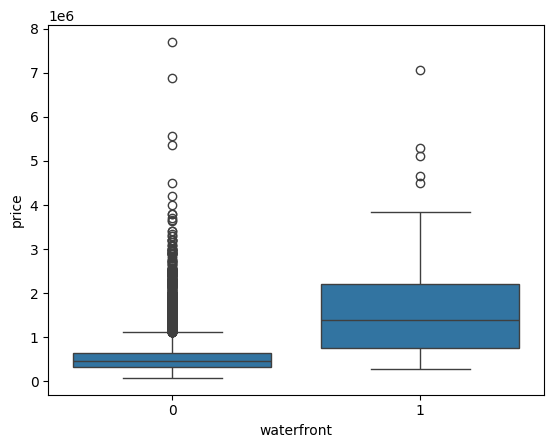

In [ ]:
sns.boxplot(x='waterfront', y='price', data=df)

<Axes: xlabel='sqft_above', ylabel='price'>

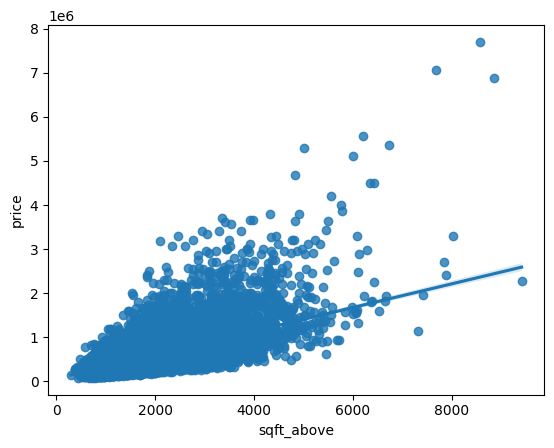

In [ ]:
sns.regplot(x='sqft_above', y='price', data=df)

In [ ]:
df['price'] = pd.to_numeric(df['price'], errors='coerce')

df_numeric = df.select_dtypes(include=['number'])

correlation = df_numeric.corr()['price'].sort_values()

# **Model Development**

In [ ]:
X = df[['long']]
Y = df['price']
lm = LinearRegression()
lm.fit(X,Y)
lm.score(X, Y)

0.00046769430149007363

In [ ]:
X = df[['sqft_living']]
Y = df['price']
lm = LinearRegression()
lm.fit(X,Y)
lm.score(X, Y)

0.4928532179037931

In [ ]:
features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]
target = 'price'

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
print(r2)

0.661402943173262


In [ ]:
Input=[('scale',StandardScaler()),('polynomial', PolynomialFeatures(include_bias=False)),('model',LinearRegression())]
from sklearn.model_selection import cross_val_score
print("done")

done


In [ ]:
features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]
X = df[features]
Y = df['price']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=1)


print("number of test samples:", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples: 3242
number of training samples: 18371


In [ ]:
features = ["floors", "waterfront", "lat", "bedrooms", "sqft_basement", "view",
            "bathrooms", "sqft_living15", "sqft_above", "grade", "sqft_living"]
target = 'price'

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
pipeline = Pipeline([('poly', PolynomialFeatures(degree=2)), ('ridge', Ridge(alpha=0.1))])

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
r2 = r2_score(y_test, y_pred)

print(r2)

0.7000720069028625


# **Model Evaluation and Refinement**

In [ ]:
from sklearn.linear_model import Ridge
Ridge_model=Ridge(alpha=0.1)
Ridge_model.fit(X,Y)
y_pred = model.predict(x_test)

r2 = r2_score(y_test, y_pred)
print(r2)


0.6486742297074538


In [ ]:
poly = PolynomialFeatures(degree=2, include_bias=False)
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.transform(x_test)

ridge_model = Ridge(alpha=0.1)

ridge_model.fit(x_train_poly, y_train)

y_pred = ridge_model.predict(x_test_poly)

r2 = r2_score(y_test, y_pred)

print(r2)

0.700274426328902
